In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Revisando datos económicos de USA

Importamos el dataset que contiene:
- Año
- Región
- Sub Región
- Estado (Y su abreviación)
- Condado (Y su nombre completo)
- GDP



In [3]:
df_county = pd.read_csv('GDPCounty.csv')

In [4]:
df_county.head()

,index,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
0,0,2001,1001,Southeast,East South Central,Alabama,AL,Autauga,Autauga County,954588000
1,1,2001,1003,Southeast,East South Central,Alabama,AL,Baldwin,Baldwin County,3929753000
2,2,2001,1005,Southeast,East South Central,Alabama,AL,Barbour,Barbour County,813278000
3,3,2001,1007,Southeast,East South Central,Alabama,AL,Bibb,Bibb County,292693000
4,4,2001,1009,Southeast,East South Central,Alabama,AL,Blount,Blount County,810381000


In [5]:
#Las regiones 
regiones = df_county['Region'].unique()
regiones

array(['Southeast', 'Far West', 'Southwest', 'Rocky Mountain',
       'Great Lakes', 'Plains', 'New England', 'Mideast'], dtype=object)

En este mapa podemos osbervar la división de las regiones encontradas:


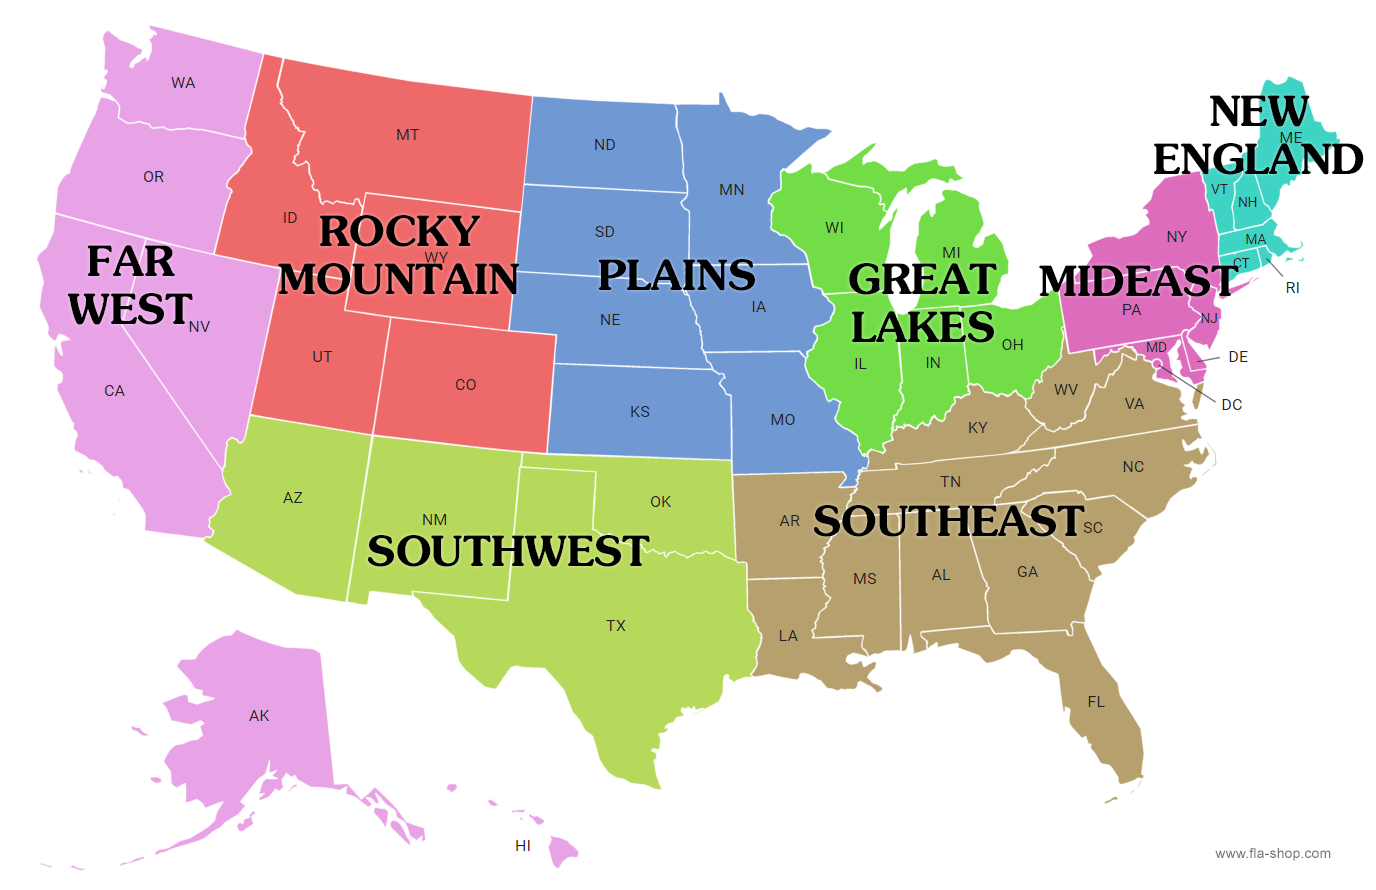

In [6]:
#Para graficar por estado su GDP a lo largo de los años
unique_states = df_county['State'].unique()
unique_Year = df_county['Year'].unique()

Antes de proceder con la grafica vamos a normalizar nuestro GDP ya que tenemos cantidades muy grandes, para ver que diferencia podemos observar. Si es mejor trabajar con un GDP normalizado o con el original.

Para esto la normalización se realizará por año primeramente, para tener cada año por separado normalizado.

## Datos Normalizados


Se va a utilizar la normalización de puntuación estándar:

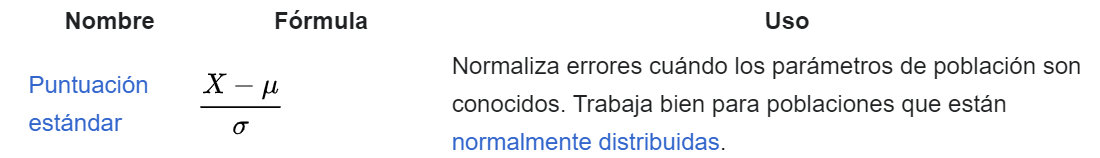

Esto para tener una escala más reducida de nuestros datos y poder osbervar comportamientos más sutiles.

In [7]:
#En esta parte dividimos por año y estados solamente
gdps = []
states = []
anio = []

for i in unique_states:
    for j in unique_Year:
        states.append(i)
        anio.append(j)
        gdps_total = df_county.loc[(df_county['State'] == i) & (df_county['Year'] == j)]
        gdps_Sta = list(gdps_total['GDP (Chained $)'])
        suma = sum(gdps_Sta)
        gdps.append(suma)

df_estados_año_gdp = pd.DataFrame()
df_estados_año_gdp['Year'] = anio
df_estados_año_gdp['state'] = states
df_estados_año_gdp['GDP'] = gdps

df_estados_año_gdp = df_estados_año_gdp.sort_values(by= 'Year')

df_estados_año_gdp.head()

,Year,state,GDP
0,2001,Alabama,156711437000
234,2001,Michigan,423652634000
72,2001,California,1705688644000
810,2001,New Hampshire,57541236000
504,2001,Utah,94015526000


In [8]:
#Ahora procedemos a normalizar los datos con nuestra función

def normalize_yearly_gdp(df):
    normalized_dfs = []
    for year in df_estados_año_gdp['Year'].unique():
        yearly_df = df_estados_año_gdp[df_estados_año_gdp['Year'] == year].copy()
        mean_gdp = yearly_df['GDP'].mean()
        std_gdp = yearly_df['GDP'].std()
        yearly_df['Normalized_GDP'] = (yearly_df['GDP'] - mean_gdp) / std_gdp
        normalized_dfs.append(yearly_df)
    return pd.concat(normalized_dfs)

# Obtener el dataframe normalizado
normalized_df = normalize_yearly_gdp(df_county)

normalized_df.head()

,Year,state,GDP,Normalized_GDP
0,2001,Alabama,156711437000,-0.327772
234,2001,Michigan,423652634000,0.524137
72,2001,California,1705688644000,4.615592
810,2001,New Hampshire,57541236000,-0.644261
504,2001,Utah,94015526000,-0.527858


Una vez que ya contamos con nuestro dataset normalizado procedemos a graficarlo y guardar las graficas en otra carpeta

In [9]:
#Para nuestros datos normalizados
for i in unique_states:
    datos = normalized_df.loc[(normalized_df['state'] == i)]
    sns.set_style('whitegrid')
    sns.lineplot(data= datos, x= 'Year', y= 'Normalized_GDP')
    plt.title(i)
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):d}'))
    plt.savefig('NormGraphs\\'+i+'.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

Obteniendo estos resultados ahora nos centramos en trabajar sin nuestros datos normalizados y comparamos resultados

## Datos Sin Normalizar

In [ ]:
#Sin normalizar
gdps = []
states = []
anio = []

for i in unique_states:
    for j in unique_Year:
        states.append(i)
        anio.append(j)
        gdps_total = df_county.loc[(df_county['State'] == i) & (df_county['Year'] == j)]
        gdps_Sta = list(gdps_total['GDP (Chained $)'])
        suma = sum(gdps_Sta)
        gdps.append(suma)

df_estados_año_gdp = pd.DataFrame()
df_estados_año_gdp['year'] = anio
df_estados_año_gdp['state'] = states
df_estados_año_gdp['GDP'] = gdps

df_estados_año_gdp = df_estados_año_gdp.sort_values(by= 'year')

df_estados_año_gdp.head()

,year,state,GDP
0,2001,Alabama,156711437000
234,2001,Michigan,423652634000
72,2001,California,1705688644000
810,2001,New Hampshire,57541236000
504,2001,Utah,94015526000


In [ ]:
#Para nuestros datos sin normalizar
for i in unique_states:
    datos = df_estados_año_gdp.loc[(df_estados_año_gdp['state'] == i)]
    sns.set_style('whitegrid')
    sns.lineplot(data= datos, x= 'year', y= 'GDP')
    plt.title(i)
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):d}'))
    plt.savefig('Graphs\\'+i+'.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
max_gdp_anio = df_estados_año_gdp.loc[df_estados_año_gdp.groupby('year')['GDP'].idxmax()]

Calculamos el estado con el GDP más grande por año y obtenemos que California siempre esta en primer lugar para todos los años.

In [ ]:
max_gdp_anio.head()

,year,state,GDP
72,2001,California,1705688644000
86,2002,California,1749474247000
88,2003,California,1830660662000
87,2004,California,1907769029000
85,2005,California,1995846739000
